<a href="https://colab.research.google.com/github/alphazx286/Data3B-DataPreprocessing/blob/master/WhatsappAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Librarys and Variables**

In [6]:
!pip install emoji

In [7]:
!pip install plotly

In [8]:
!pip install wordcloud

In [9]:
!pip install nltk

In [10]:
import pandas as pd
import re
import emoji
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

plt.style.use('ggplot')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Preparate Database**

In [12]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9][0-9]), ([0-9]+):([0-9][0-9]) (AM|PM) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
# Finds username of any given format.
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
# Upload your file here
conversationPath = '/content/drive/MyDrive/Colab Notebooks/Files/WhatsApp - UberMerida.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
   
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])

#**Cleaning the Database**

In [13]:
df['day'] = df['Date'].dt.strftime('%a')
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = df['Date'].dt.year
df['date'] = df['Date'].apply(lambda x: x.date())

In [14]:
df = df.dropna()


In [15]:
 df.head()

,Date,Time,Author,Message,day,month,year,date
0,2020-02-09,8:19 PM,Eleazar Chófer Uber,Como van hermosos,Sun,Feb,2020,2020-02-09
1,2020-02-09,8:20 PM,Alfredo,live location shared On,Sun,Feb,2020,2020-02-09
2,2020-02-09,8:20 PM,Pasos Chófer Uber,<Media omitted>,Sun,Feb,2020,2020-02-09
3,2020-02-09,8:22 PM,Natanael Chófer Uber,<Media omitted>,Sun,Feb,2020,2020-02-09
6,2020-02-09,8:25 PM,Natanael Chófer Uber,Ways,Sun,Feb,2020,2020-02-09


In [16]:
df.Author.unique()

array(['Eleazar Chófer Uber', 'Alfredo', 'Pasos Chófer Uber',
       'Natanael Chófer Uber', 'Ramses Alcocer Uber',
       'Manuel Cobos Melalim', 'Cesar Castellanos Uber',
       'Jerry Chofer Uber', 'Julian Manotas Uber', 'Ninette Uber Socia',
       'Andrés Chófer Uber', 'Pacheco Socio Uber', 'Chachalaca Uber',
       'Paris Uber', 'Héctor Martel Uber', 'Oscar Tizimin Uber',
       'Poblano Victor Uber', 'Güemes Socio Uber'], dtype=object)

In [17]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)

In [18]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))

In [19]:
# Creates a list of unique Authors
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
    
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
    
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
    
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)

  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media) 
  print()

Stats of Eleazar Chófer Uber -
Messages Sent 1223
Words per message 4.390024529844644
Media Messages Sent 446

Stats of Alfredo -
Messages Sent 2398
Words per message 6.230191826522102
Media Messages Sent 1105

Stats of Natanael Chófer Uber -
Messages Sent 976
Words per message 4.730532786885246
Media Messages Sent 499

Stats of Ramses Alcocer Uber -
Messages Sent 2742
Words per message 4.199489423778264
Media Messages Sent 628

Stats of Pasos Chófer Uber -
Messages Sent 1508
Words per message 5.818965517241379
Media Messages Sent 371

Stats of Cesar Castellanos Uber -
Messages Sent 774
Words per message 3.8372093023255816
Media Messages Sent 96

Stats of Jerry Chofer Uber -
Messages Sent 388
Words per message 4.270618556701031
Media Messages Sent 79

Stats of Julian Manotas Uber -
Messages Sent 265
Words per message 4.0
Media Messages Sent 52

Stats of Ninette Uber Socia -
Messages Sent 479
Words per message 9.732776617954071
Media Messages Sent 63

Stats of Andrés Chófer Uber -
Messa

#**Graphs**

Text(0.5, 1.0, 'When the group members are most active')

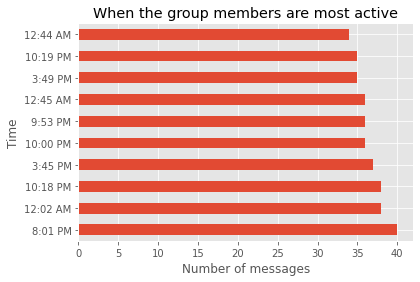

In [21]:
messages_df['Time'].value_counts().head(10).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Time')
plt.title('When the group members are most active')

In [22]:
def dayofweek(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,6000]
    )),
  showlegend=False
)
fig.show()

In [23]:
df1 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]      # adding extra helper column --> message_count.
df1.drop(columns='year', inplace=True)         # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df1

,date,message_count
0,2020-02-09,111
1,2020-02-10,273
2,2020-02-11,99
3,2020-02-12,120
4,2020-02-13,144
...,...,...
232,2020-11-19,7
233,2020-11-20,1
234,2020-11-21,10
235,2020-11-22,4


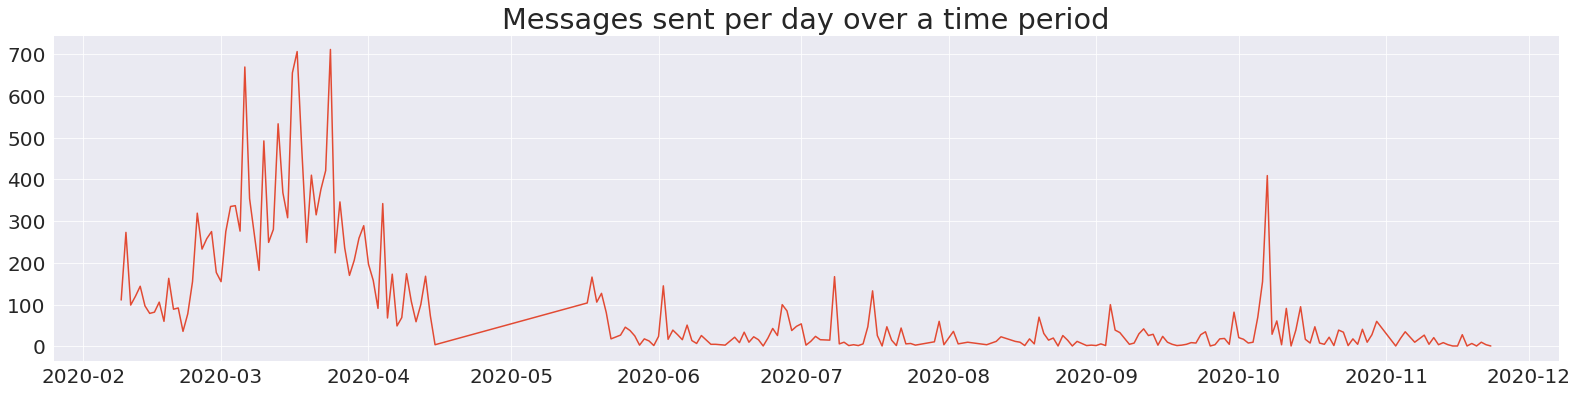

In [24]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      # Same as `plt.figure(figsize = (27, 6))`

# A basic plot
plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period');

# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

In [26]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,date,message_count
0,2020-03-24,711
1,2020-03-17,706
2,2020-03-06,669
3,2020-03-16,655
4,2020-03-13,533
5,2020-03-10,492
6,2020-03-18,467
7,2020-03-23,421
8,2020-03-20,410
9,2020-10-07,409


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



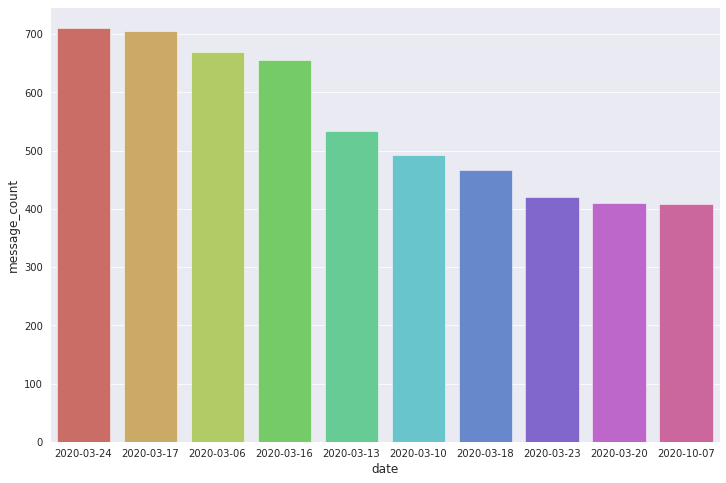

In [27]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

# A bar plot for top 10 days
sns.barplot(top10days.date, top10days.message_count, palette="hls");

# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

In [28]:
df.Date = pd.DatetimeIndex(df.Time).time

df.Time

0         8:19 PM
1         8:20 PM
2         8:20 PM
3         8:22 PM
6         8:25 PM
           ...   
39992     7:41 PM
39993     7:41 PM
39994     7:42 PM
39995     8:35 PM
39996    12:53 AM
Name: Time, Length: 20845, dtype: object

In [29]:
# count total message 
total_messages = df.shape[0]

# count media message
media_messages = df[df.Message == '<Media ommitted>'].shape[0]

# count links
urlPattern = r'(https?://\S+)'
links = df.Message.apply(lambda x: re.findall(urlPattern, x)).str.len().sum()

In [30]:
total_messages = df.shape[0]
media_messages = df[df.Message == '<Media ommitted>'].shape[0]
urlPattern = r'(https?://\S+)'
links = df.Message.apply(lambda x: re.findall(urlPattern, x)).str.len().sum()

In [31]:
# create array of emojis used
emojis=[]
for string in df.Message:
    my_str = str(string)
    for each in my_str:
        if each in emoji.UNICODE_EMOJI:
            emojis.append(each)

In [32]:
# turn Array into dataframe
emoji_df = pd.DataFrame(emojis)
emoji_df = emoji_df[0].value_counts().head(10).reset_index()
emoji_df.columns = ['Emojis', 'Frenquency']
emoji_messages = emoji_df.Frenquency.sum()
emoji_df

,Emojis,Frenquency
0,🤣,911
1,😂,246
2,🤭,109
3,🥺,92
4,🏻,72
5,♂,67
6,🤔,59
7,😟,57
8,🙄,55
9,🤦,54


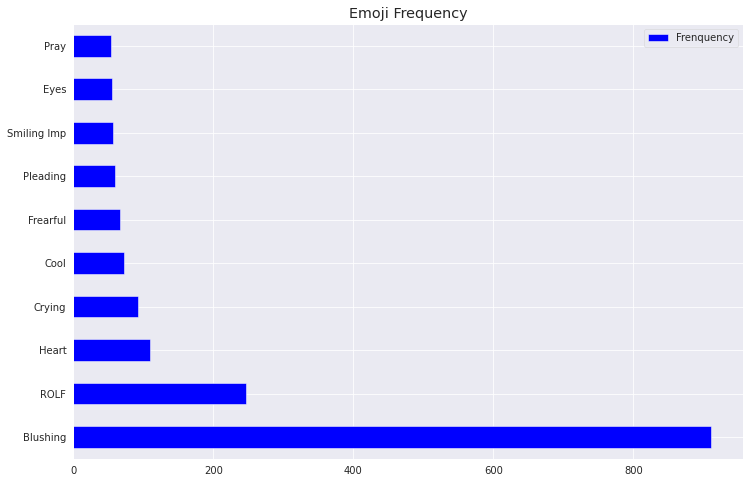

In [33]:
emoji_df.plot(kind='barh', color = 'blue', title='Emoji Frequency').set_yticklabels(
['Blushing', 'ROLF', 'Heart', 'Crying', 'Cool', 'Frearful', 'Pleading', 'Smiling Imp','Eyes', 'Pray']);

In [34]:
# print All Stats
print("Group: Pillars")
print("Messages:", total_messages)
print("Media:", media_messages)
print("Emoji:", emoji_messages)

Group: Pillars
Messages: 20845
Media: 0
Emoji: 1722


In [35]:
# Count total message per user
dfMessages = df.Author.value_counts().reset_index()
dfMessages.columns = ['Author', 'Messages']

In [36]:
# Save nan-media from messages
dfNonMedia = df[df.Message.str.contains('<Media omitted>')]
df = df[~df.Message.str.contains('<Media omitted>')]

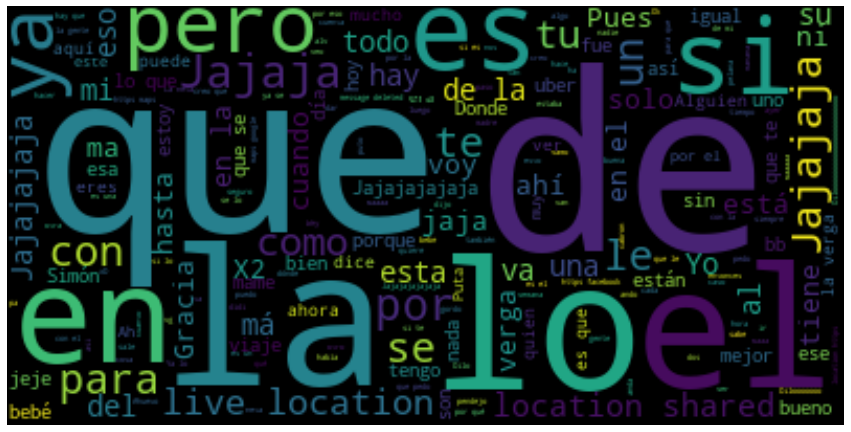

In [37]:
# Generate a word cloud image
text = " ".join(review for review in df["Message"])

wordcloud = WordCloud(random_state=1,stopwords = STOPWORDS).generate(text)

bar,ax = plt.subplots(figsize=(15,10))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
#nltk language analysis library
import nltk
#This process can be done before manually, download the stopwords from the nltk library
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


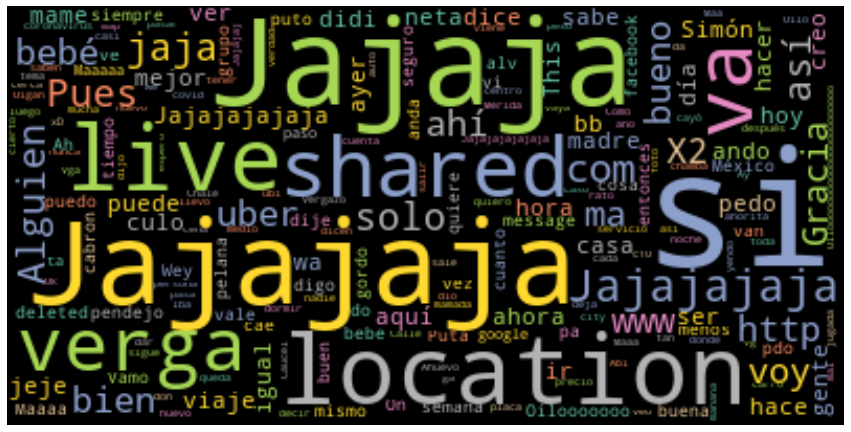

In [42]:
wordcloud = WordCloud(random_state=2,stopwords = stop_words_sp,colormap='Set2', collocations=False).generate(text)

bar,ax = plt.subplots(figsize=(15,10))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

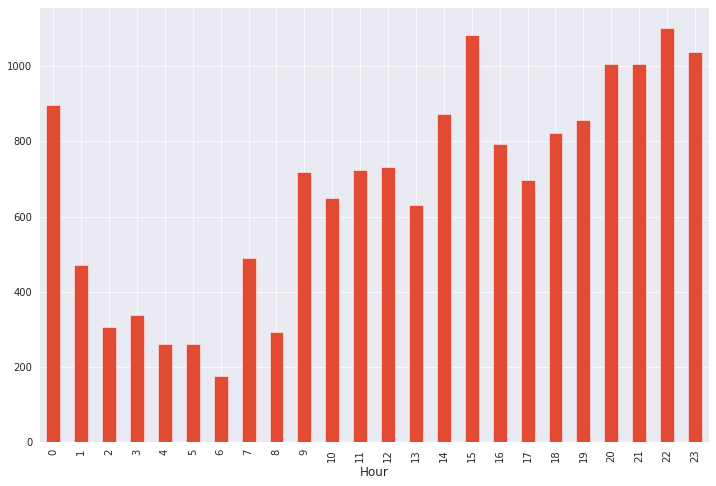

In [43]:
df['Hour'] = df['Date'].apply(lambda x: x.hour)
df.groupby(['Hour']).size().sort_index().plot(x="Hour", kind='bar')